## A SCRIPT TO SCRAPE JPT JOURNAL SEARCH

### A scipt goes over a list of links with search results, creates a list of paper likns, then accesses this papers, cpoies there contets into a single txt file and creates a woldcloud for the joint file content analysis

In [267]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import seaborn as sns

In [268]:
def get_articles_list(search_URL, pages):
    """The function creates a list of paper URLs from the search page"""
    URL_list = []
    article_list = []
    
    for i in range(1,pages+1):
        URL_list.append(search_URL + str(i))
        
    
    for i in URL_list:
        page = requests.get(i, headers = headers)
        soup = BeautifulSoup(page.content, 'html.parser')
        results = soup.find_all(attrs = {"class":"PromoB-title"})

        for j in range(0,(len(results))):
            article_list.append((results[j].contents[1]['href']))
    
    return article_list

#### Create the list of articles' URL

In [269]:
search_URL = 'https://jpt.spe.org/search?q=oman&p='
pages = 18
articles_list = get_articles_list(search_URL, pages)

In [ ]:
page = requests.get(articles_list[1], headers = headers)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find_all(attrs = {"class":"RichTextArticleBody-body RichTextBody"})
results_inner = results[0].find_all('p') 

for i in results_inner:
    print(i.contents[0])
    
    with open('Oman.txt', 'a+') as File1:
        File1.write(i.contents[0])





#### Copy all papers into a single .txt file

In [270]:
with open('Oman.txt', 'w') as file:
    
    for article in articles_list:
        page = requests.get(article, headers = headers)
        soup = BeautifulSoup(page.content, 'html.parser')
        results = soup.find_all(attrs = {"class":"RichTextArticleBody-body RichTextBody"})
        text = results[0].find_all('p')

        for i in text:
            try:
                file.write(i.contents[0])
            except IndexError:
                pass
            except TypeError:
                pass
            except UnicodeEncodeError:
                pass
            
        file.write(3*'\n')

#### List of additional stopwords

In [ ]:
stopwords2 = ['pressure',
              'companies',
              'year',
              'fluid',
              'challenge'
              'well',
              'energy',
              'production',
              'will',
              'formation',
              'application',
              'drilling',
              'oil',
              'offshore',
              'project',
              'SPE',
              'several',
              'now',
              'used',
              'use',
              'process',
              'time',
              'potential',
              'region',
              'global',
              'many',
              'years',
              'may',
              'key',
              'need',
              'technology',
              'technologies',
              'field',
              'paper',
              'company',
              'one',
              'first',
              'require',
              'challenge',
              'new',
              'current',
              'currently',
              'director',
              'area',
              'along',
              'less',
              'experience',
              'lower',
              'addition'
              'applied',
              'major',
              'less',
              'able',
              'trying',
              'East',
              'Abu',
              'Saudi',
              'become',
              'PhD',
              'vice',
              'challneges',
              'Oman',
              'Wood',
              'Baker',
              'end',
              'BS',
              'discussion',
              'partner',
              'author',
              'take',
              'range',
              'USD',
              'chief',
              'conference',
              'shown',
              'variety',
              'conducted',
              'discussed',
              'PDO'
              
    
]

for i in stopwords2:
    STOPWORDS.add(i)

#### Create wordcloud form the aggregated .txt-file

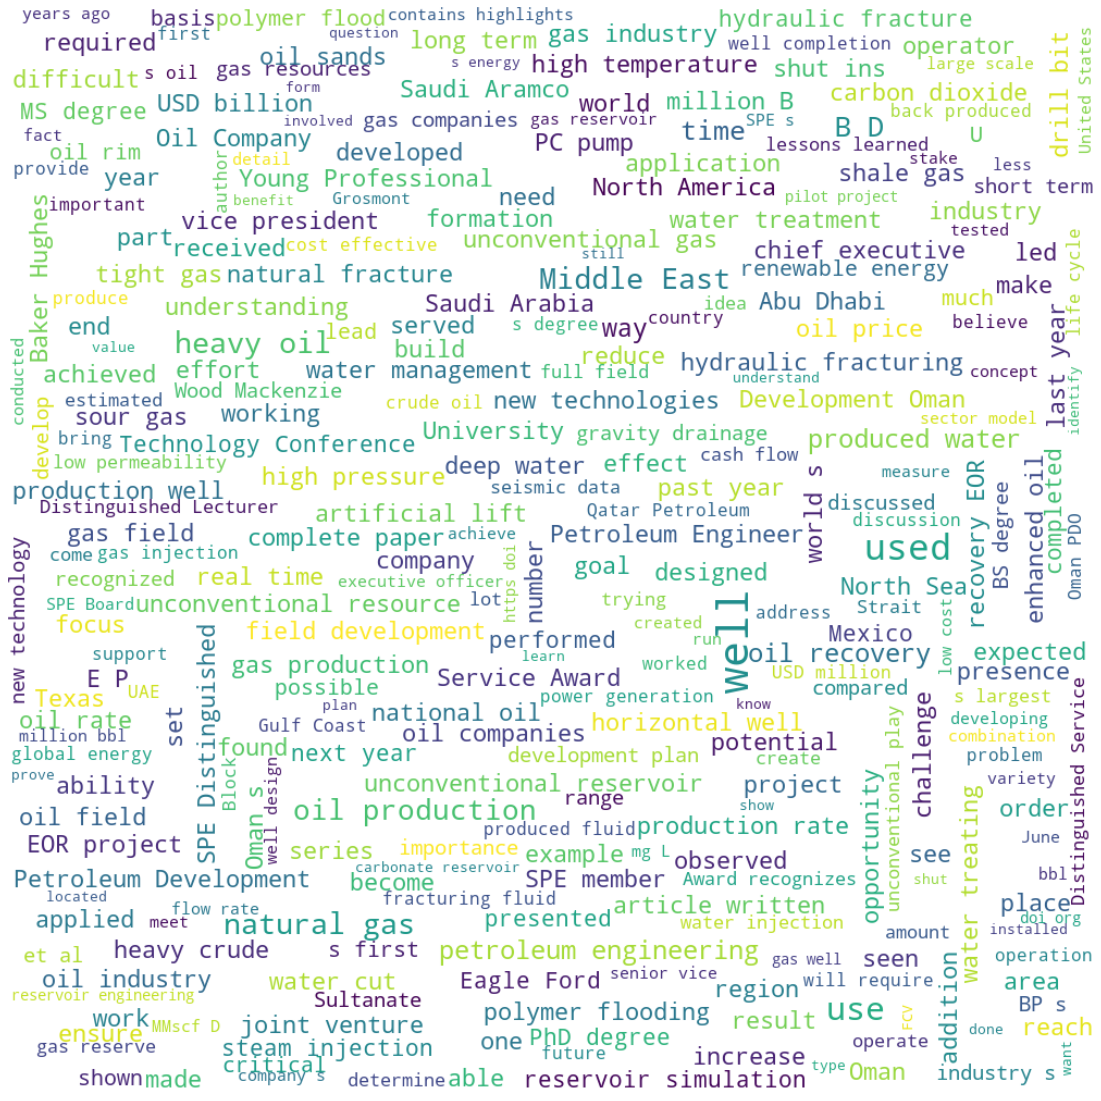

In [271]:
# Read the whole text.
text = open('Oman.txt').read()

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40, stopwords = STOPWORDS, background_color = 'white', width = 1000, height = 1000, max_words = 300, collocation_threshold = 1).generate(text)
plt.figure(figsize = (20.0,20.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [ ]:
url = 'https://onepetro.org/search-results?q=oman&fl_SiteID=1&rg_PublicationDate=01%2f01%2f2017+TO+05%2f12%2f2022&page=1'
    
page = requests.get(url, headers = headers)
soup = BeautifulSoup(page.content, "html.parser")

results = soup.find_all(attrs = {"class":"citation-label"})
print(results[3])
print(results[3].contents[3]['href'])

In [18]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

url1 = 'https://onepetro.org/search-results?q=iran&sort=Date+-+Newest+First&fl_SiteID=1&qb=%7b%22q%22%3a%22iran%22%7d&page=1'
page1 = requests.get(url1, headers = headers)
soup1 = BeautifulSoup(page1.content, "html.parser")
results1 = soup1.find_all('div', attrs = {"data-facet-field-name":'FacetCategoryIDs_1'})


In [ ]:
for child in tag2:
    print(int(child.contents[1].string.strip('(').strip(')')))


In [52]:



field_tag1 = results1[0]



#soup12 = BeautifulSoup(field_tag1, "html.parser")


subjects--Artificial_Lift_Systems___-chk-0-0
subjects-Artificial_Lift_Systems___-Beam_and_related_pumping_techniques_-chk-1-0
subjects-Artificial_Lift_Systems___-Electric_submersible_pumps__-chk-1-1
subjects-Artificial_Lift_Systems___-Gas_lift____-chk-1-2
subjects-Artificial_Lift_Systems___-Gas_well_deliquification-chk-1-3
subjects-Artificial_Lift_Systems___-Hydraulic_and_jet_pumps__-chk-1-4
subjects-Artificial_Lift_Systems___-Progressing_cavity_pumps-chk-1-5
subjects--Asset_and_Portfolio_Management-chk-0-1
subjects-Asset_and_Portfolio_Management-Acquisition_and_divestiture-chk-1-0
subjects-Asset_and_Portfolio_Management-Capital_budgeting_and_project_selection-chk-1-1
subjects-Asset_and_Portfolio_Management-Economic_analysis_guidelines-chk-1-2
subjects-Asset_and_Portfolio_Management-Field_development_optimization_and_planning-chk-1-3
subjects-Asset_and_Portfolio_Management-Integrated_asset_modeling-chk-1-4
subjects-Asset_and_Portfolio_Management-Portfolio_analysis__management_and_optim

In [ ]:
tag2 = soup1.find_all('label', attrs = {"class":'checkbox-label'})



In [ ]:
subject = []
count = []

p = re.compile('^subjects-')
for i in tag2:
    m = p.match(i['for'])
    if m:
        
        if i['for'][-1] == '0' or i['for'][-3] == '0' or i['for'][-4] == '0':
            pass
        else:
            print(i['for'])
            subject.append(i['for'].split('-')[2].strip('__')) 
            count.append(int(i.contents[1].string.strip('(').strip(')')))
            

In [ ]:
data = {'Subject':subject, 'Count':count}
df = pd.DataFrame(data)
df.replace(to_replace = 'Naturally', value = 'Naturally-fractured reservoirs', inplace = True)

df.sort_values(by = 'Count', ascending = False, inplace= True)
df.head(50)

In [ ]:
plt.figure(figsize = (20,60))
sns.barplot(x = df['Count'], y = df['Subject'])

In [2]:
def onepetroKeyWordParsing(URL):
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
    }
    
    # Getting the first order left-box tags
    page = requests.get(URL, headers = headers)
    soup_1 = BeautifulSoup(page.content, "html.parser")
    results = soup_1.find_all('div', attrs = {"data-facet-field-name":'FacetCategoryIDs_1'})
    field_tag = (results[0].contents[3])
    
    subject = []
    count = []
    
    # Getting tags for disciplines and paper counts
    p = re.compile('^subjects-')
    for child in field_tag.descendants:
        if child.name == 'input':
            try:
                line = child['id']
                line.strip('subject-').split('-chk-')
                
                subject.append(i['for'].split('-')[2].strip('__')) 
                count.append(int(i.contents[1].string.strip('(').strip(')')))
                
                
                
            except KeyError:
                pass
    


    #Process retrieved tags

    for i in tag:
        m = p.match(i['for'])
        if m:
            if i['for'][-1] == '0' or i['for'][-3] == '0' or i['for'][-4] == '0':
                pass
            else:
                print(i['for'])

    
    #Buid a dataframe, tiny adjustments to naming
    data = {'Subject':subject, 'Count':count}
    df = pd.DataFrame(data)
    df.replace(to_replace = 'Naturally', value = 'Naturally-fractured reservoirs', inplace = True)
    df.sort_values(by = 'Count', ascending = False, inplace= True)
    
    #Plotting
    plt.figure(figsize = (20,30))
    sns.barplot(x = df['Count'], y = df['Subject'])

In [174]:
URL = 'https://onepetro.org/search-results?q=iran&sort=Date+-+Newest+First&fl_SiteID=1&qb=%7b%22q%22%3a%22iran%22%7d&rg_PublicationDate=01/01/2017%20TO%2001/01/2022'


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
    }
    
# Getting the first order left-box tags
page = requests.get(URL, headers = headers)
soup_1 = BeautifulSoup(page.content, "html.parser")
results = soup_1.find_all('div', attrs = {"data-facet-field-name":'FacetCategoryIDs_1'})
field_tag = (results[0].contents[3])



In [178]:
print()

<AxesSubplot:xlabel='Count', ylabel='Subject'>

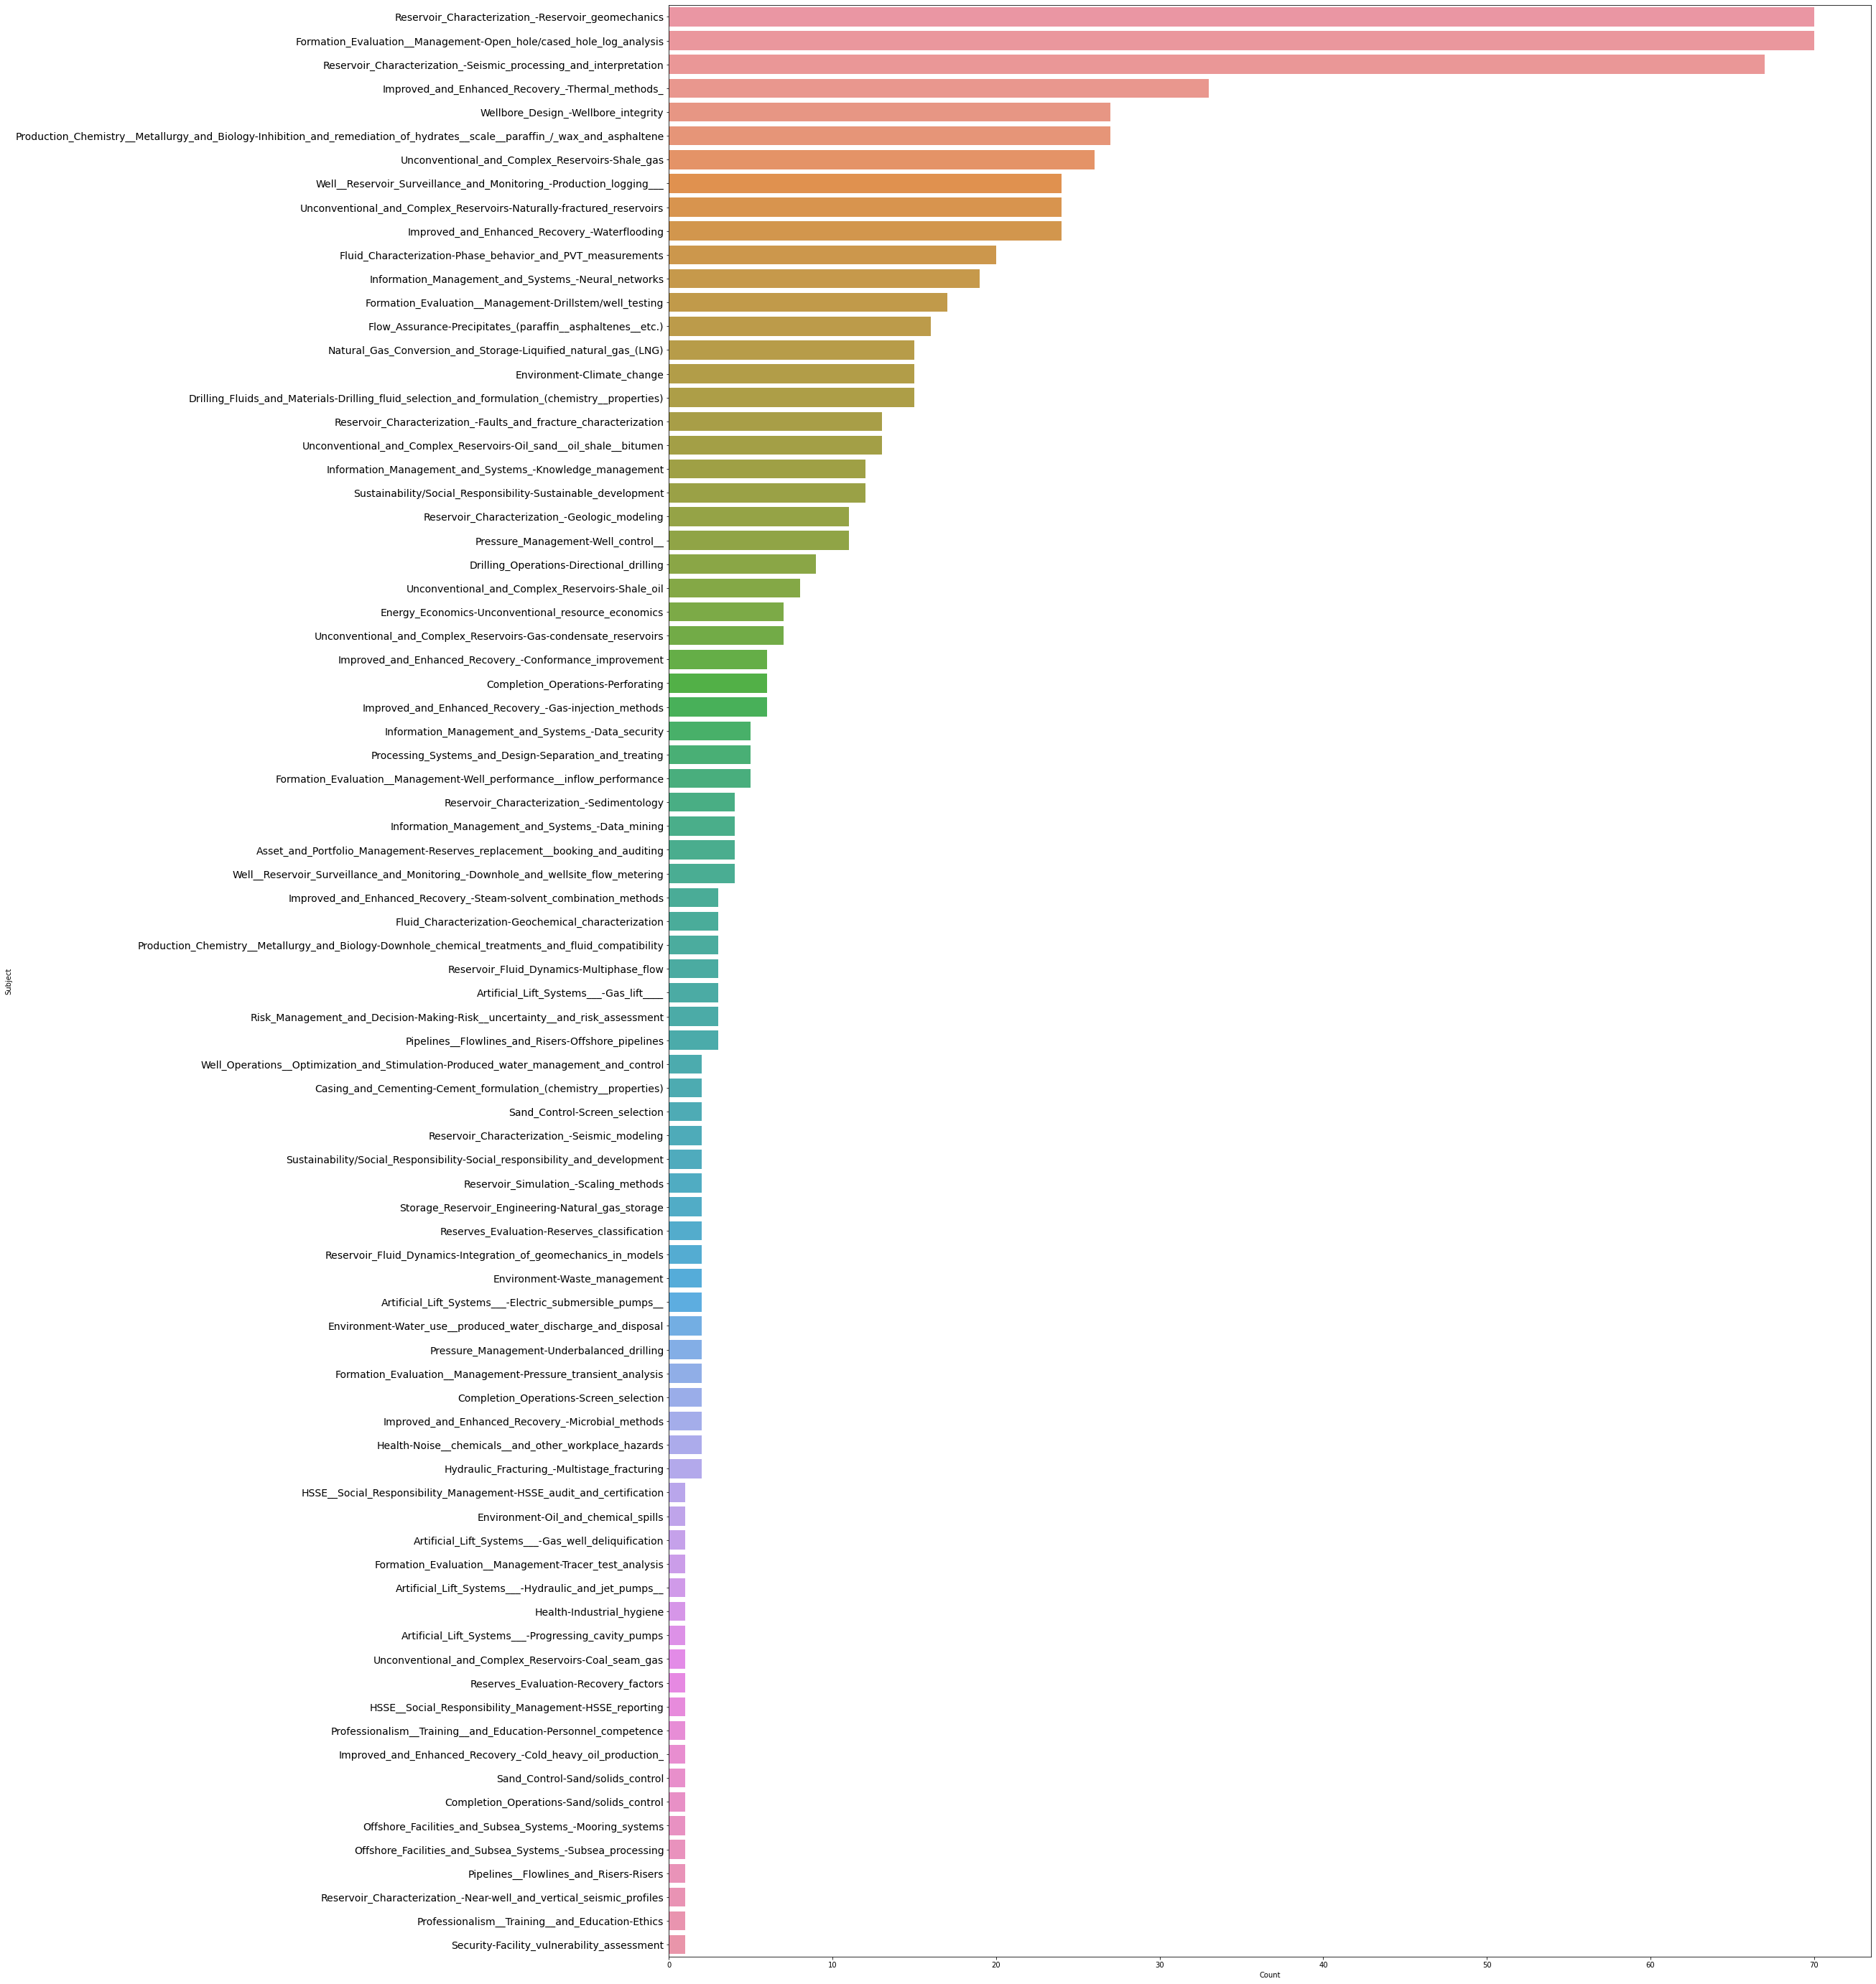

In [229]:
subject = []
count = []

# Getting tags for disciplines and paper counts
p = re.compile('^subjects-')
for child in field_tag.descendants: 
    try:
        if child['class'][0] == 'checkbox-label':
            s = child['for'].strip('subjects--').split('-chk-')
            n = s[1].split('-')
            n1 = int(n[0])
            n2 = int(n[1])
            
            if n1 != 0 and n2 != 0:
                subject.append(s[0])
               
                
                for child_2 in child.descendants:
                    if child_2.name =='span':
                        n = int(child_2.string.strip('(').strip(')'))
                        count.append(n) 
    except TypeError:
        pass
    except KeyError:
        pass
    
#Buid a dataframe, tiny adjustments to naming
data = {'Subject':subject, 'Count':count}
df = pd.DataFrame(data)
df.sort_values(by = 'Count', ascending = False, inplace= True)

#Plotting
plt.figure(figsize = (30,50))
plt.yticks(fontsize = 14.0)
sns.barplot(x = df['Count'], y = df['Subject'])


In [253]:
def onepetroKeyWordParsing(URL):
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
    }
    
    # Getting the first order left-box tags
    page = requests.get(URL, headers = headers)
    soup_1 = BeautifulSoup(page.content, "html.parser")
    results = soup_1.find_all('div', attrs = {"data-facet-field-name":'FacetCategoryIDs_1'})
    field_tag = (results[0].contents[3])
    
    subject = []
    count = []

    # Getting tags for disciplines and paper counts
    p = re.compile('^subjects-')
    for child in field_tag.descendants: 
        try:
            if child['class'][0] == 'checkbox-label':
                s = child['for'].strip('subjects--').split('-chk-')
                n = s[1].split('-')
                n1 = int(n[0])
                n2 = int(n[1])

                if n1 != 0 and n2 != 0:
                    subject.append(s[0])


                    for child_2 in child.descendants:
                        if child_2.name =='span':
                            n = int(child_2.string.strip('(').strip(')'))
                            count.append(n) 
        except TypeError:
            pass
        except KeyError:
            pass

    #Buid a dataframe, tiny adjustments to naming
    data = {'Subject':subject, 'Count':count}
    df = pd.DataFrame(data)
    df.sort_values(by = 'Count', ascending = False, inplace= True)

    return df



Text(0, 0.5, 'Y-Axis')

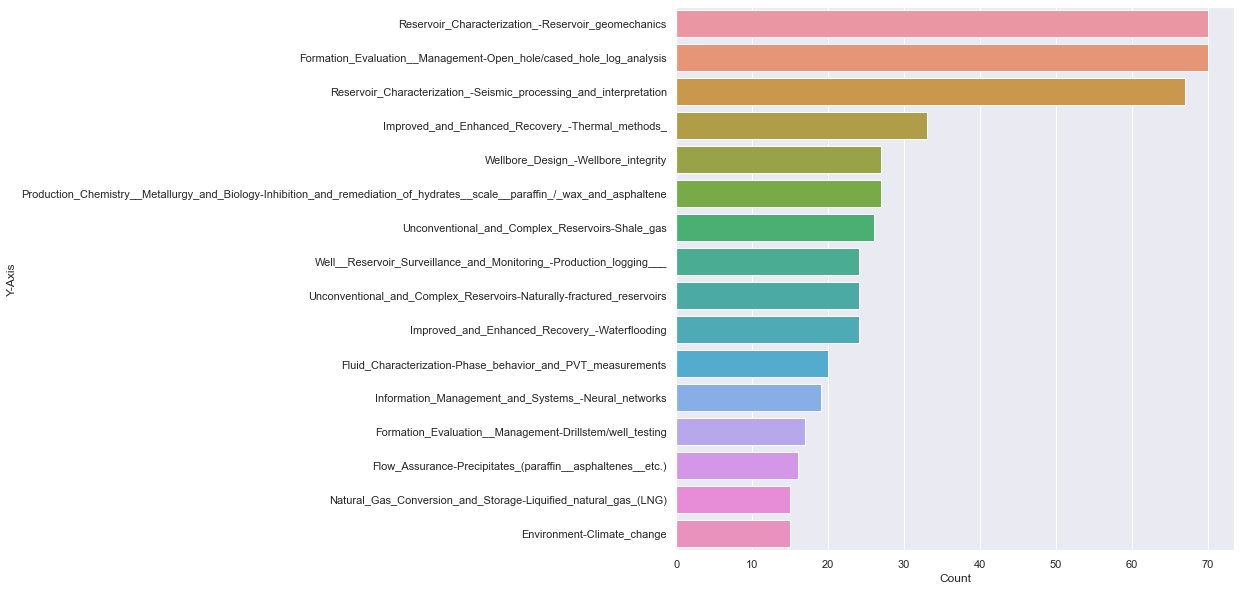

In [264]:
URL = 'https://onepetro.org/search-results?q=iran&sort=Date+-+Newest+First&fl_SiteID=1&qb=%7b%22q%22%3a%22iran%22%7d&rg_PublicationDate=01/01/2017%20TO%2001/01/2022'

df = onepetroKeyWordParsing(URL)


#Getting Top-15
df_f = df.copy(deep = True)
df_f.reset_index(inplace = True, drop = True)
df_n = df_f.loc[0:15]
df_n.head(20)

#Plotting
p = sns.barplot(x = df_n['Count'], y = df_n['Subject'])
#sns.set(rc={'figure.figsize':(10,10)})
p.set_ylabel("Y-Axis", fontsize = 12)

,Subject,Count
0,Reservoir_Characterization_-Reservoir_geomecha...,70
1,Formation_Evaluation__Management-Open_hole/cas...,70
2,Reservoir_Characterization_-Seismic_processing...,67
3,Improved_and_Enhanced_Recovery_-Thermal_methods_,33
4,Wellbore_Design_-Wellbore_integrity,27
5,Production_Chemistry__Metallurgy_and_Biology-I...,27
6,Unconventional_and_Complex_Reservoirs-Shale_gas,26
7,Well__Reservoir_Surveillance_and_Monitoring_-P...,24
8,Unconventional_and_Complex_Reservoirs-Naturall...,24
9,Improved_and_Enhanced_Recovery_-Waterflooding,24


Text(0, 0.5, 'Y-Axis')

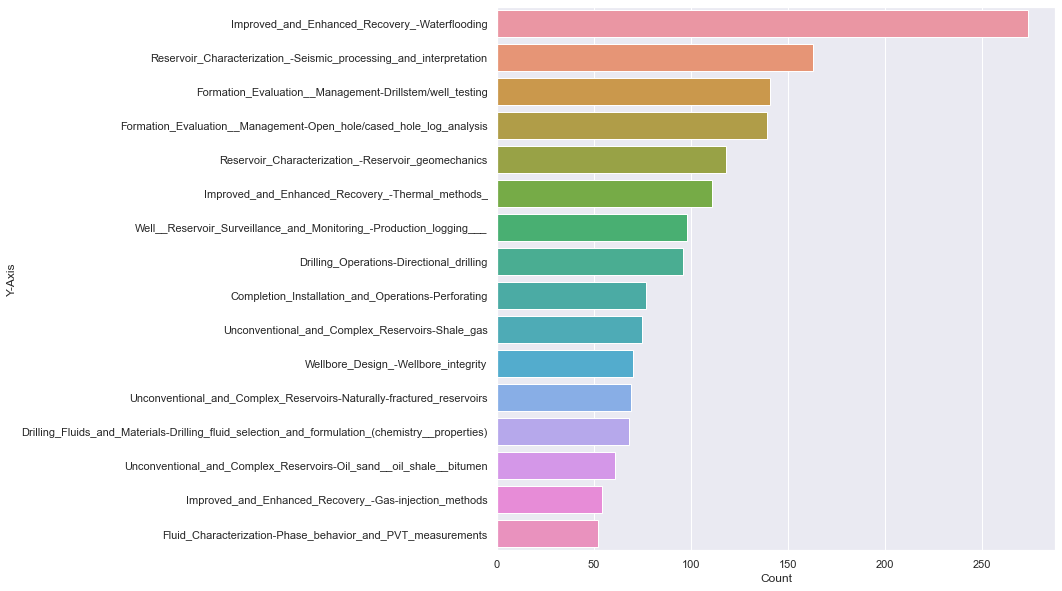

In [265]:
URL = 'https://onepetro.org/search-results?q=oman&sort=Date+-+Newest+First&fl_SiteID=1&qb=%7b%22q%22%3a%22oman%22%7d&rg_PublicationDate=01/01/2017%20TO%2001/01/2022'
    
df = onepetroKeyWordParsing(URL)


#Getting Top-15
df_f = df.copy(deep = True)
df_f.reset_index(inplace = True, drop = True)
df_n = df_f.loc[0:15]
df_n.head(20)

#Plotting
p = sns.barplot(x = df_n['Count'], y = df_n['Subject'])
#sns.set(rc={'figure.figsize':(10,10)})
p.set_ylabel("Y-Axis", fontsize = 12)

Text(0, 0.5, 'Y-Axis')

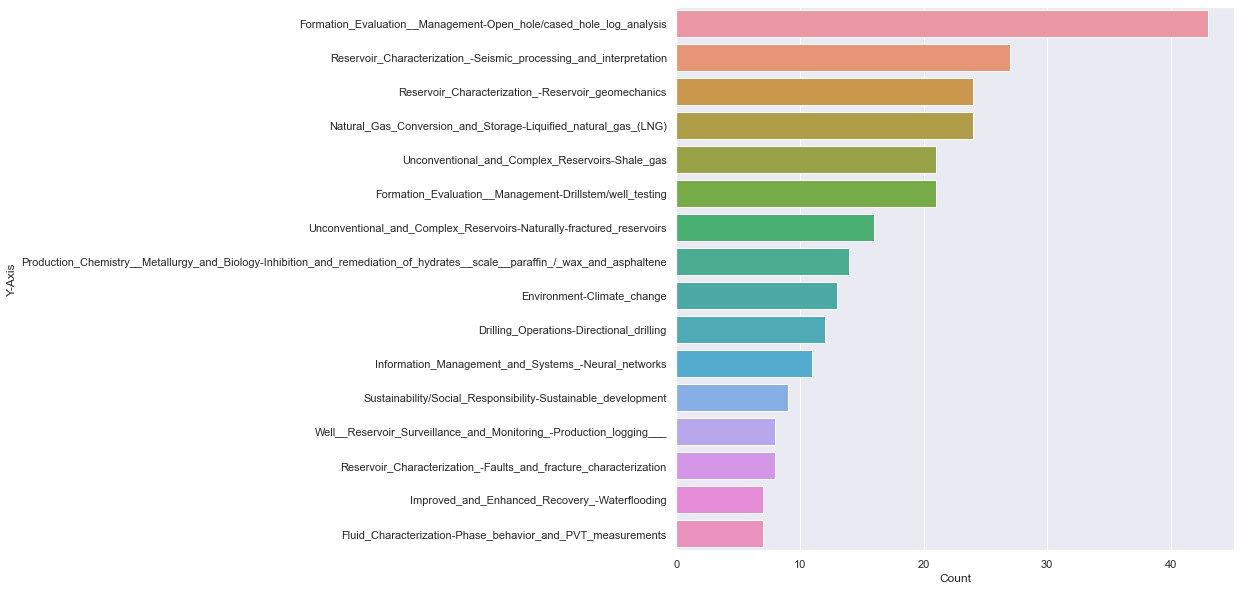

In [266]:
URL = 'https://onepetro.org/search-results?q=algeria&sort=Date+-+Newest+First&fl_SiteID=1&rg_PublicationDate=01%2f01%2f2017+TO+01%2f01%2f2022&qb={%22q%22:%22algeria%22}&page=1'
    
df = onepetroKeyWordParsing(URL)


#Getting Top-15
df_f = df.copy(deep = True)
df_f.reset_index(inplace = True, drop = True)
df_n = df_f.loc[0:15]
df_n.head(20)

#Plotting
p = sns.barplot(x = df_n['Count'], y = df_n['Subject'])
#sns.set(rc={'figure.figsize':(10,10)})
p.set_ylabel("Y-Axis", fontsize = 12)